In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
data = pd.read_csv('Errors_analysis_export_widedata.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             379 non-null    int64  
 1   week                   379 non-null    int64  
 2   position               379 non-null    object 
 3   name                   379 non-null    object 
 4   overall_rank           155 non-null    float64
 5   Andy Behrens           155 non-null    float64
 6   Scott Pianowski        155 non-null    float64
 7   Dalton Del Don         155 non-null    float64
 8   Matt Harmon            150 non-null    float64
 9   Kate Magdziuk          155 non-null    float64
 10  Tera Roberts           155 non-null    float64
 11  points                 379 non-null    int64  
 12  ranking                379 non-null    float64
 13  overall_rank_error     155 non-null    float64
 14  Andy Behrens_error     155 non-null    float64
 15  Scott 

In [31]:
data_long = pd.read_csv('Errors_analysis_export_long.csv')
data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2653 non-null   int64  
 1   week        2653 non-null   int64  
 2   position    2653 non-null   object 
 3   name        2653 non-null   object 
 4   analyst     2653 non-null   object 
 5   error       1080 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 124.5+ KB


In [13]:
analyst_total_error = data.filter(regex='_error').mean()
analyst_total_error

overall_rank_error       8.522581
Andy Behrens_error       8.780645
Scott Pianowski_error    8.600000
Dalton Del Don_error     8.645161
Matt Harmon_error        8.586667
Kate Magdziuk_error      8.425806
Tera Roberts_error       8.567742
dtype: float64

In [19]:
analyst_monthly_error = data.filter(regex='_error|week').groupby(by=['week']).mean()
analyst_monthly_error

,overall_rank_error,Andy Behrens_error,Scott Pianowski_error,Dalton Del Don_error,Matt Harmon_error,Kate Magdziuk_error,Tera Roberts_error
week,,,,,,,
1,8.500000,10.000000,8.416667,8.500000,8.666667,8.333333,8.750000
2,8.750000,8.416667,8.750000,10.166667,8.583333,9.250000,8.916667
3,10.333333,11.250000,10.666667,12.083333,10.000000,9.916667,10.166667
4,11.000000,10.166667,11.000000,11.000000,11.000000,11.000000,10.833333
5,6.583333,7.000000,6.250000,7.333333,6.363636,5.583333,6.916667
6,6.166667,6.000000,5.833333,6.500000,5.666667,5.666667,6.083333
7,8.333333,9.083333,8.833333,8.750000,9.583333,8.750000,8.416667
8,10.916667,10.583333,10.750000,10.666667,10.583333,10.750000,10.916667
9,9.750000,9.333333,9.666667,9.166667,9.500000,9.916667,9.166667


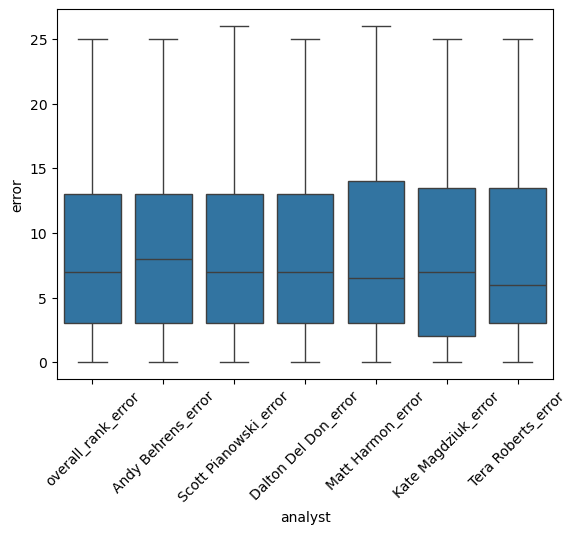

In [5]:
sns.boxplot(x='analyst', y='error', data=data_long)
plt.xticks(rotation=45)
plt.show()

In [25]:
model = ols(formula = "error ~ C(analyst)", data=data_long).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  error   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04203
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               1.00
Time:                        12:36:33   Log-Likelihood:                -3571.7
No. Observations:                1080   AIC:                             7157.
Df Residuals:                    1073   BIC:                             7192.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               8.7806      0.532     16.490      0.000       7.736       9.825
C(analyst)[T.Dalton Del Don_error]     -0.1355      0.753     -0.180      0.857      -1.613       1.342
C(analyst)[T.Kate Magdziuk_error]      -0.3548      0.753     -0.471      0.638      -1.832       1.123
C(analyst)[T.Matt Harmon_error]        -0.1940      0.759     -0.255      0.798      -1.684       1.296
C(analyst)[T.Scott Pianowski_error]    -0.1806      0.753     -0.240      0.810      -1.658       1.297
C(analyst)[T.Tera Roberts_error]       -0.2129      0.753     -0.283      0.777      -1.690       1.265
C(analyst)[T.overall_rank_error]       -0.2581      0.753     -0.343      0.732      -1.736       1.220
==============================================================================
Omnibus:                       94.829   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.433
Skew:                           0.713   Prob(JB):                     5.71e-23
Kurtosis:                       2.509   Cond. No.                         7.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(analyst),6.0,11.082372,1.847062,0.04203,0.999694
Residual,1073.0,47154.205591,43.946138,NaN,NaN
